In [5]:
# Import the libraries and dependecies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [6]:
# Import data 
filename='C:/Users/chero/Documents/personalprojects/creditcarddata.csv'
df = pd.read_csv(filename)


In [7]:
# Data Cleaning and pre-processing

## skim the data 
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [8]:
# check the dimension of the dataset 
df.shape


(30000, 25)

In [9]:
### check for any null values (return true if null and false is not null) and count and sum null values
df.isnull()
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulted    0
dtype: int64

In [10]:
### check the data types 
df.dtypes


ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
defaulted    int64
dtype: object

In [11]:
## change the following columns from interger format to categorical data
### sex 
### education
### marriage
### defaulted 
### pay0-pay6

df['SEX'] = df['SEX'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')
df['defaulted'] = df['defaulted'].astype('category')
df['PAY_0'] = df['PAY_0'].astype('category')
df['PAY_2'] = df['PAY_2'].astype('category')
df['PAY_3'] = df['PAY_3'].astype('category')
df['PAY_4'] = df['PAY_4'].astype('category')
df['PAY_5'] = df['PAY_5'].astype('category')
df['PAY_6'] = df['PAY_6'].astype('category')


In [12]:
### checking the data types again 
df.dtypes

ID              int64
LIMIT_BAL       int64
SEX          category
EDUCATION    category
MARRIAGE     category
AGE             int64
PAY_0        category
PAY_2        category
PAY_3        category
PAY_4        category
PAY_5        category
PAY_6        category
BILL_AMT1       int64
BILL_AMT2       int64
BILL_AMT3       int64
BILL_AMT4       int64
BILL_AMT5       int64
BILL_AMT6       int64
PAY_AMT1        int64
PAY_AMT2        int64
PAY_AMT3        int64
PAY_AMT4        int64
PAY_AMT5        int64
PAY_AMT6        int64
defaulted    category
dtype: object

In [13]:
## description of the continous data
df.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [14]:
## descrription of the categorial data 
df.describe(include='category')

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,defaulted
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,7,4,11,11,11,11,10,10,2
top,2,2,2,0,0,0,0,0,0,0
freq,18112,14030,15964,14737,15730,15764,16455,16947,16286,23364


In [15]:
continuous=df.select_dtypes(['int64','float64']).columns
print(continuous)


Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


In [16]:
## Data visualization : Identifying outliers 

#In the project, we can drop the unwanted variable columns and create box plots to note any possible outliers. We need need the Payment and billing variables for september 2005 

df.drop('ID', axis=1, inplace=True)
df.drop('BILL_AMT2', axis=1, inplace=True)
df.drop('BILL_AMT3', axis=1, inplace=True)
df.drop('BILL_AMT4', axis=1, inplace=True)
df.drop('BILL_AMT5', axis=1, inplace=True)
df.drop('BILL_AMT6', axis=1, inplace=True)
df.drop('PAY_AMT2', axis=1, inplace=True)
df.drop('PAY_AMT3', axis=1, inplace=True)
df.drop('PAY_AMT4', axis=1, inplace=True)
df.drop('PAY_AMT5', axis=1, inplace=True)
df.drop('PAY_AMT6', axis=1, inplace=True)
df.drop('PAY_2', axis=1, inplace=True)
df.drop('PAY_3', axis=1, inplace=True)
df.drop('PAY_4', axis=1, inplace=True)
df.drop('PAY_5', axis=1, inplace=True)
df.drop('PAY_6', axis=1, inplace=True)


In [17]:
## select the continous data columns 
continuous=df.select_dtypes(['int64','float64']).columns
continuous


Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1'], dtype='object')

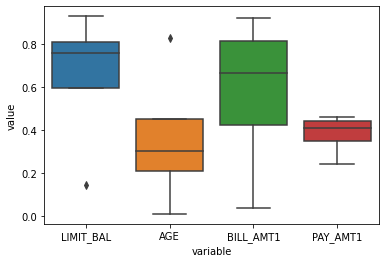

In [18]:
## create box plots for the continous variables 
## Judging from the box plots, there seem to be no evidence of outliers in the 
   ##data provided for the month of septe,ber.
continousData = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['LIMIT_BAL','AGE','BILL_AMT1','PAY_AMT1'])

sns.boxplot(x="variable", y="value", data=pd.melt(continousData))

plt.show()

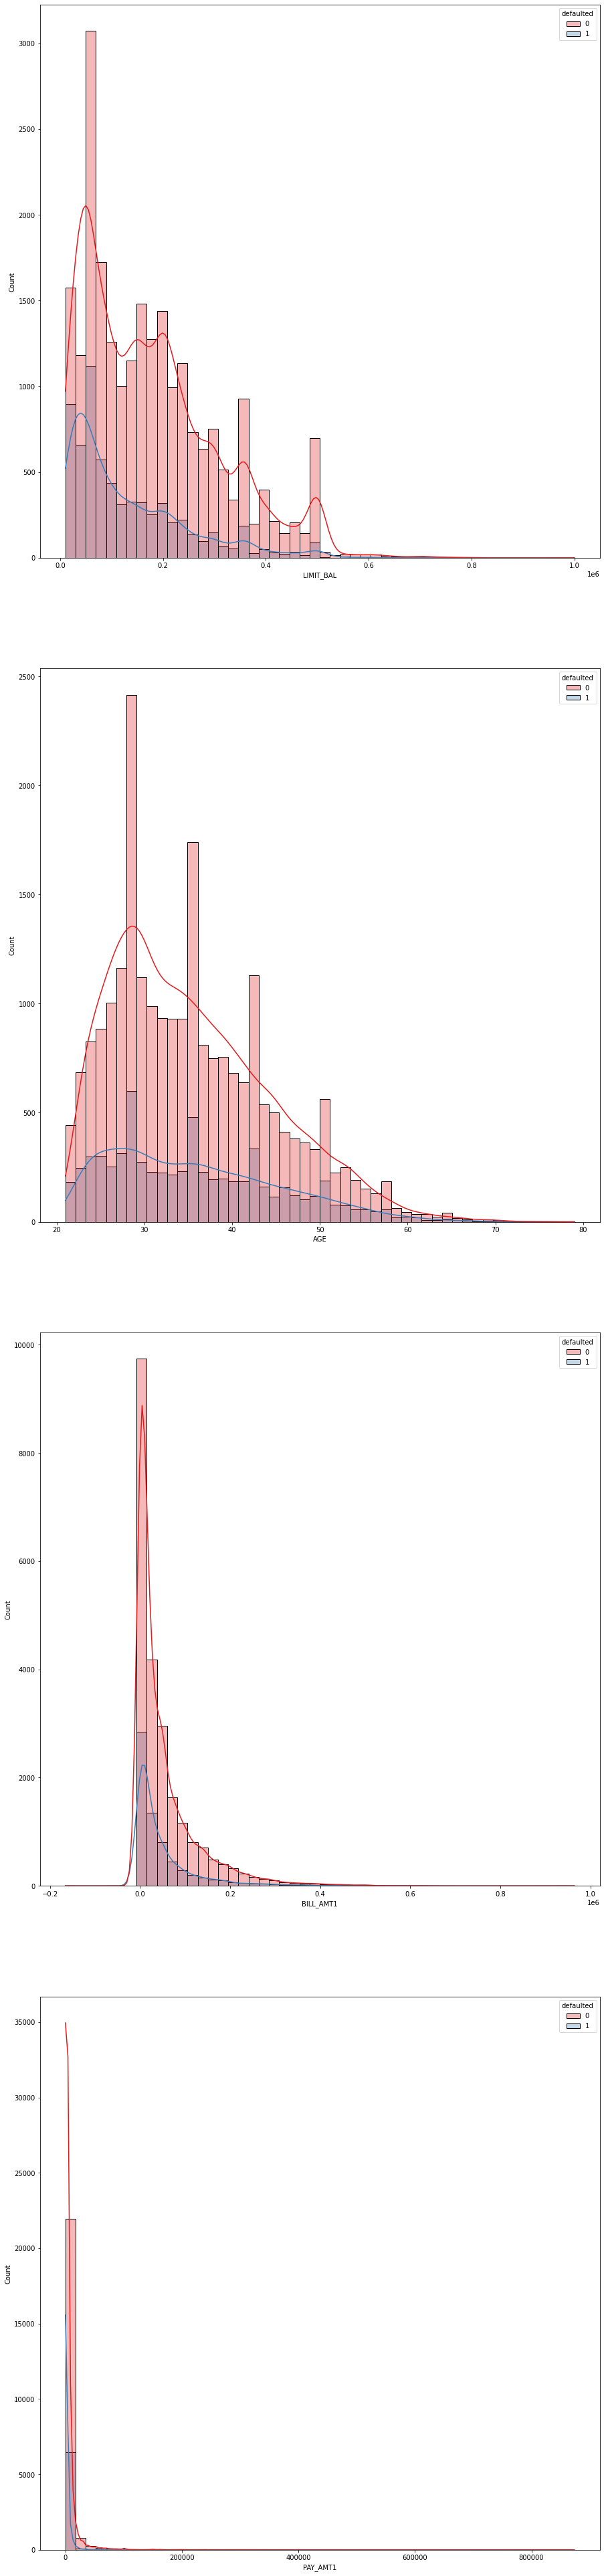

In [19]:
fig,axes= plt.subplots(nrows=len(continuous), figsize=(15,70))
for i,var in enumerate(continuous):
    sns.histplot(data=df, x=df[continuous[i]], bins=50, ax=axes[i], kde=True,\
                 hue='defaulted', palette='Set1', alpha=0.3)
plt.show()

c:\users\chero\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\users\chero\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\users\chero\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterp

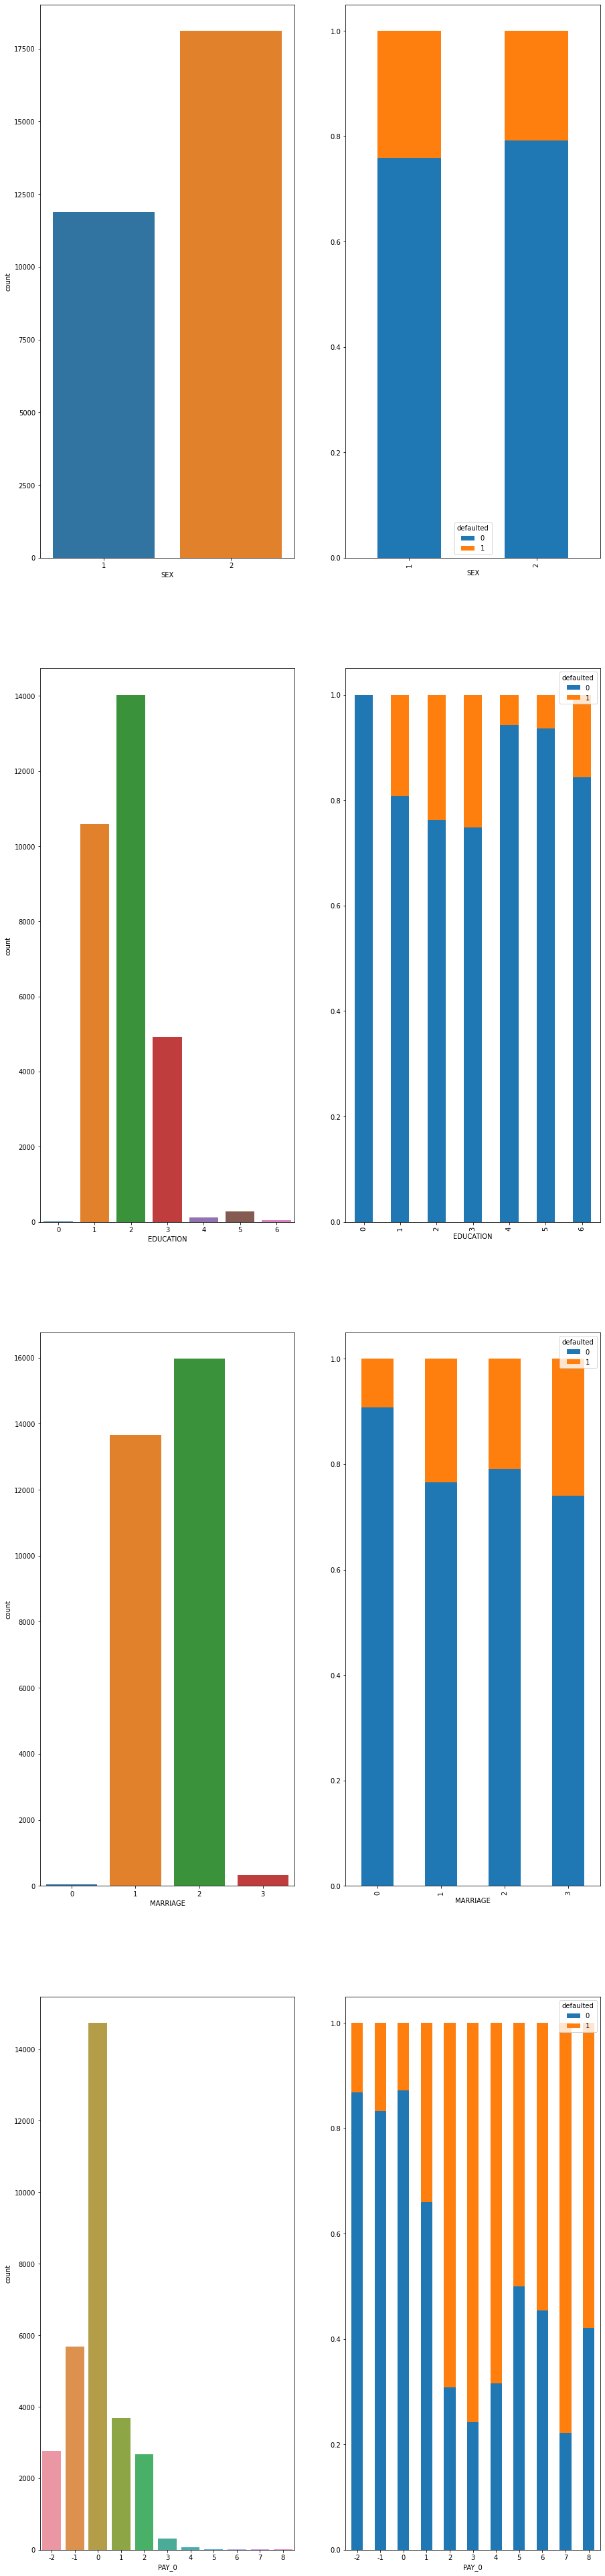

In [20]:
## Visualizing the categorical variables 
categorical=df.iloc[:,(df.nunique()<=11).values].columns
df[categorical]=df[categorical].astype('category')
fig,axes= plt.subplots(nrows=len(categorical[:-1]), ncols=2, figsize=(15,70))
for i,var in enumerate(categorical[:-1]):
    sns.countplot(df[categorical[i]], ax=axes[i][0])

    pd.crosstab(df[var], df['defaulted'], normalize='index').plot(kind='bar', stacked=True, ax=axes[i][1])
    plt.xticks(rotation=0)
plt.show()

In [21]:
## Correlation Coefficient Matrix 
## The plot below represents the correlation matrix of the dataset. Following the exploration of the
##colors, there exist a positive correlation between the variables. 
fig = px.imshow(df.corr())
fig.show()


In [22]:
## Data Analysis 
## set the dependent variable to have 0 and 1 dummi variables 1 for Yes and 0 for No

X = pd.get_dummies(df.drop(['defaulted'], axis=1))
y = df['defaulted']


## split the train and the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [23]:
y_train.head()

10780    0
19603    1
13737    0
11832    0
12367    1
Name: defaulted, dtype: category
Categories (2, int64): [0, 1]

In [24]:
# build and compile the model 
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

In [25]:
# fit predict and evaluate 
model.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
750/750 [==============================] - 2s 2ms/step - loss: 41876608.0000 - accuracy: 0.7773
Epoch 2/200
750/750 [==============================] - 1s 2ms/step - loss: 0.5299 - accuracy: 0.7795
Epoch 3/200
750/750 [==============================] - 1s 2ms/step - loss: 0.5276 - accuracy: 0.7795
Epoch 4/200
750/750 [==============================] - 1s 2ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 5/200
750/750 [==============================] - 1s 1ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 6/200
750/750 [==============================] - 1s 1ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 7/200
750/750 [==============================] - 2s 3ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 8/200
750/750 [==============================] - 1s 2ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 9/200
750/750 [==============================] - 2s 2ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 10/200
750/750 [==============================] - 2s 3ms/step - loss: 0.5275 -

750/750 [==============================] - 3s 4ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 82/200
750/750 [==============================] - 3s 4ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 83/200
750/750 [==============================] - 3s 4ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 84/200
750/750 [==============================] - 2s 3ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 85/200
750/750 [==============================] - 2s 2ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 86/200
750/750 [==============================] - 2s 2ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 87/200
750/750 [==============================] - 2s 2ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 88/200
750/750 [==============================] - 1s 2ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 89/200
750/750 [==============================] - 2s 2ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 90/200
750/750 [==============================] - 2s 3ms/step - loss: 0.5275 - accuracy: 

750/750 [==============================] - 2s 2ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 161/200
750/750 [==============================] - 2s 3ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 162/200
750/750 [==============================] - 3s 4ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 163/200
750/750 [==============================] - 1s 2ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 164/200
750/750 [==============================] - 1s 1ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 165/200
750/750 [==============================] - 1s 2ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 166/200
750/750 [==============================] - 1s 2ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 167/200
750/750 [==============================] - 3s 4ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 168/200
750/750 [==============================] - 3s 4ms/step - loss: 0.5275 - accuracy: 0.7795
Epoch 169/200
750/750 [==============================] - 4s 5ms/step - loss: 0.5275 - a

In [26]:
y_hat = model.predict(X_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

188/188 [==============================] - 1s 4ms/step


In [27]:
# Calculating the accuracy score of the model 
accuracy_score(y_test, y_hat)


0.776

In [28]:
# save and load the model 
model.save('tfmodel')


INFO:tensorflow:Assets written to: tfmodel\assets
